In [1]:
import sys
sys.path.append('./face_alignment/')

import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import torch
import face_alignment

In [2]:
img = io.imread('./test_img.jpg')

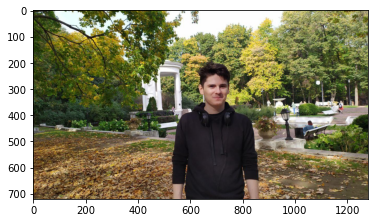

In [3]:
plt.imshow(img)

In [4]:
img.shape

(720, 1280, 3)

In [3]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False, 
                                  device='cpu', face_detector='blazeface')

In [26]:
# it works
_ = fa.face_detector.detect_from_batch(torch.tensor([img.transpose(2, 0, 1)]))

<img src="./blazeface_batch_detect_docstring.png">

It says it support numpy but numpy arrays can't be handled properly:

In [27]:
_ = fa.face_detector.detect_from_batch(np.array([img]))

In [29]:
# the first and the third coordinates equal 1.0 and 1.5. This happend due to incorrect numpy handling
_

[array([[281.5315094 ,   1.08152449, 281.96625113,   1.5162667 ,
           0.91659629]])]

If we try to swap the axis of the image so it would have the same shape in the end as torch tensor, we get the follwing error:

In [32]:
_ = fa.face_detector.detect_from_batch(np.array([img.transpose(2, 0, 1)]))

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\resize.cpp:3572: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'


It says that image is empty!

Now I reloaded this notebook with my fix applied!

In [4]:
_ = fa.face_detector.detect_from_batch(np.array([img.transpose(2, 0, 1)]))

In [5]:
_

[array([[647.56225586, 259.56588745, 751.90026855, 363.90402222,
           0.91659629]])]

And it works

In [6]:
_ = fa.face_detector.detect_from_batch(torch.tensor([img.transpose(2, 0, 1)]))

In [8]:
_

[array([[647.56225586, 259.56588745, 751.90026855, 363.90402222,
           0.91659629]])]

Tensor detection works too!

Since I've changed only detector batching function, this probably didn't break anything (I hope)